In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Data
def load_state():
    df = pd.read_csv('./ml_folder/state_df_ml_export.csv')
    return df

# Load State Data and train SVR, RF and XGBoost Models

In [3]:
state_df = load_state()

In [4]:
state_df.head(5)

,pct_male,pct_female,pct_white,pct_black,pct_asian,pct_hispanic,pct_young,pct_adult,pct_elderly,pct_low_edu,...,pct_short_comute,pct_long_comute,pct_unemp,pct_emp,pct_car,pct_public_trans,pct_0car,log_visits,log_distance,median_income
0,0.5550,0.4450,0.9891,0.0000,0.0000,0.0109,0.2051,0.5119,0.2831,0.0000,...,0.8304,0.1696,0.0346,0.9654,1.0000,0.0000,0.0000,1.945910,9.462188,162802.0
1,0.4752,0.5248,0.9407,0.0000,0.0000,0.0593,0.2050,0.5177,0.2773,0.0627,...,1.0000,0.0000,0.0269,0.9731,0.8969,0.0000,0.1031,2.197225,9.035630,63929.0
2,0.4749,0.5251,0.4821,0.0452,0.0047,0.4680,0.3452,0.5998,0.0550,0.2375,...,0.6193,0.3807,0.0763,0.9237,0.9917,0.0083,0.0000,1.791759,9.378225,78190.0
3,0.4456,0.5544,0.3715,0.0747,0.1376,0.4162,0.4846,0.4537,0.0618,0.1539,...,0.5343,0.4657,0.0742,0.9258,1.0000,0.0000,0.0000,1.791759,9.802396,82083.0
4,0.4710,0.5290,0.5803,0.1845,0.0742,0.1610,0.2876,0.6104,0.1020,0.0639,...,0.6275,0.3725,0.0615,0.9385,1.0000,0.0000,0.0000,2.639057,10.308819,116667.0


In [5]:
df = state_df.copy()

In [6]:
df.head(5)

,pct_male,pct_female,pct_white,pct_black,pct_asian,pct_hispanic,pct_young,pct_adult,pct_elderly,pct_low_edu,...,pct_short_comute,pct_long_comute,pct_unemp,pct_emp,pct_car,pct_public_trans,pct_0car,log_visits,log_distance,median_income
0,0.5550,0.4450,0.9891,0.0000,0.0000,0.0109,0.2051,0.5119,0.2831,0.0000,...,0.8304,0.1696,0.0346,0.9654,1.0000,0.0000,0.0000,1.945910,9.462188,162802.0
1,0.4752,0.5248,0.9407,0.0000,0.0000,0.0593,0.2050,0.5177,0.2773,0.0627,...,1.0000,0.0000,0.0269,0.9731,0.8969,0.0000,0.1031,2.197225,9.035630,63929.0
2,0.4749,0.5251,0.4821,0.0452,0.0047,0.4680,0.3452,0.5998,0.0550,0.2375,...,0.6193,0.3807,0.0763,0.9237,0.9917,0.0083,0.0000,1.791759,9.378225,78190.0
3,0.4456,0.5544,0.3715,0.0747,0.1376,0.4162,0.4846,0.4537,0.0618,0.1539,...,0.5343,0.4657,0.0742,0.9258,1.0000,0.0000,0.0000,1.791759,9.802396,82083.0
4,0.4710,0.5290,0.5803,0.1845,0.0742,0.1610,0.2876,0.6104,0.1020,0.0639,...,0.6275,0.3725,0.0615,0.9385,1.0000,0.0000,0.0000,2.639057,10.308819,116667.0


In [7]:
# Feature Scaling

df = (df - df.min()) / (df.max() - df.min())

In [8]:
df.head(5)

,pct_male,pct_female,pct_white,pct_black,pct_asian,pct_hispanic,pct_young,pct_adult,pct_elderly,pct_low_edu,...,pct_short_comute,pct_long_comute,pct_unemp,pct_emp,pct_car,pct_public_trans,pct_0car,log_visits,log_distance,median_income
0,0.562000,0.438000,0.9891,0.0000,0.0000,0.0109,0.2051,0.564201,0.2831,0.000000,...,0.8304,0.1696,0.047678,0.952322,1.0000,0.0000,0.000000,0.037395,0.334960,0.647684
1,0.460718,0.539282,0.9407,0.0000,0.0000,0.0593,0.2050,0.570594,0.2773,0.076203,...,1.0000,0.0000,0.037068,0.962932,0.8969,0.0000,0.115986,0.065326,0.289322,0.248200
2,0.460338,0.539662,0.4821,0.0452,0.0047,0.4680,0.3452,0.661082,0.0550,0.288649,...,0.6193,0.3807,0.105140,0.894860,0.9917,0.0083,0.000000,0.020263,0.325977,0.305820
3,0.423150,0.576850,0.3715,0.0747,0.1376,0.4162,0.4846,0.500055,0.0618,0.187044,...,0.5343,0.4657,0.102246,0.897754,1.0000,0.0000,0.000000,0.020263,0.371360,0.321549
4,0.455388,0.544612,0.5803,0.1845,0.0742,0.1610,0.2876,0.672765,0.1020,0.077662,...,0.6275,0.3725,0.084746,0.915254,1.0000,0.0000,0.000000,0.114431,0.425543,0.461281


from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=3, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print(random_search.best_params_)


from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(grid_search.best_params_)


h = RandomForestRegressor(n_estimators=500, random_state=42)
h.fit(X_train, y_train)


h = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=10, min_samples_leaf=4)
h.fit(X_train, y_train)


from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean():.4f}")


# Import Scikit-learn Packages

In [9]:
import ace_tools_open as tools
import shap
# Import Scikit-learn

import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target and feature class

In [10]:
# Split data

X = df.drop('log_visits',axis=1)
y = df['log_visits']

# Split data into train test

In [11]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Standardize data (required for SVR)

In [13]:
# Standardize data (required for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize Models --Comparing SVR, RF and XGBoost

In [14]:
# Initialize and train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Initialize and train Support Vector Regressor
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)


# Initializing and training the XGBoost model
xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
xgb.fit(X_train, y_train)
# Making predictions
xgb_pred = xgb.predict(X_test)

# Evaluate Models Performance

In [15]:
# Compute evaluation metrics
def evaluate_model(model_name, y_true, y_pred):
    return {
        'Model': model_name,
        'R² Score': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred)
    }

rf_results = evaluate_model("Random Forest", y_test, rf_pred)
svr_results = evaluate_model("Support Vector Regression", y_test, svr_pred)
xgb_results = evaluate_model("XGBoost", y_test, xgb_pred)

# Combine results into a DataFrame
results_df = pd.DataFrame([rf_results, svr_results, xgb_results])

# Display results
tools.display_dataframe_to_user(name="Model Comparison: Random Forest vs SVR", dataframe=results_df)


Model Comparison: Random Forest vs SVR


# Plot Regression Plots

Text(0.5, 1.0, 'Observed vs Predicted Values (R² = 0.83)')

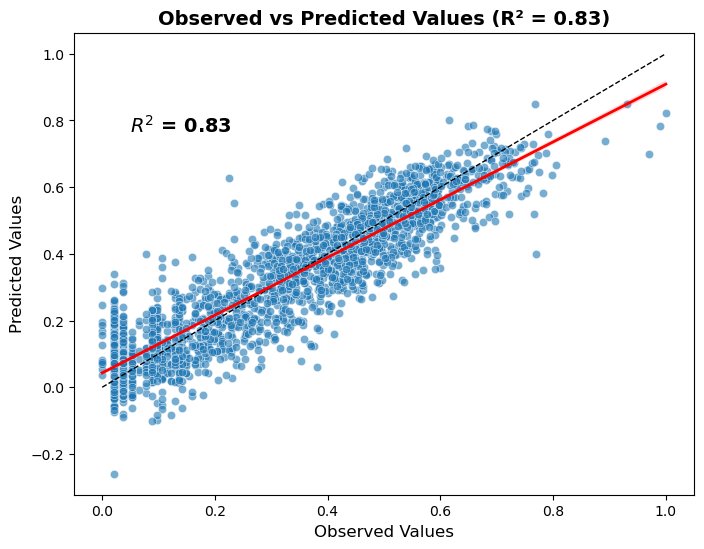

In [16]:
observed = y_test#np.random.rand(100) * 100  # Replace with y_test
predicted = svr_pred#observed + np.random.randn(100) * 10  # Replace with y_pred

# Compute R² value
r2 = r2_score(observed, predicted)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=observed, y=predicted, alpha=0.6)

# Add 1:1 diagonal line
plt.plot([min(observed), max(observed)], [min(observed), max(observed)], 'k--', linewidth=1)

# Add regression line
sns.regplot(x=observed, y=predicted, scatter=False, color='red', line_kws={"linewidth": 2})

# Add R² value inside the chart
plt.text(0.05 * max(observed), 0.9 * max(predicted), f"$R^2$ = {r2:.2f}", fontsize=14, weight='bold')

# Labels and title
plt.xlabel("Observed Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title(f"Observed vs Predicted Values (R² = {r2:.2f})", fontsize=14, weight='bold')


Text(0.5, 1.0, 'Observed vs Predicted Values (R² = 0.92)')

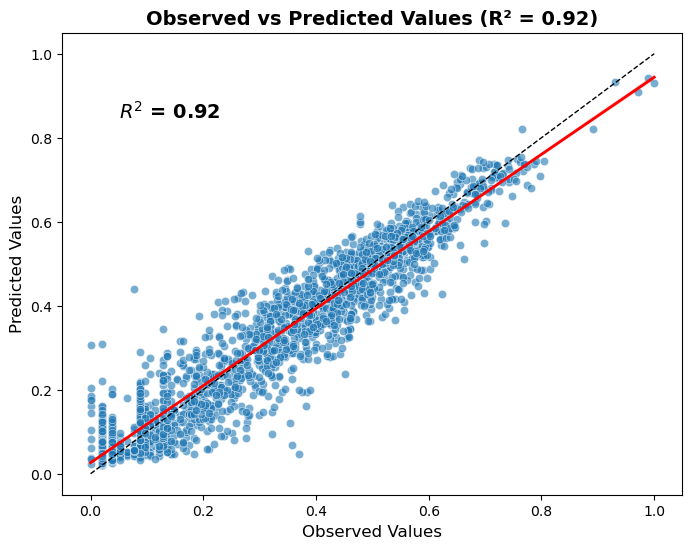

In [17]:
observed = y_test#np.random.rand(100) * 100  # Replace with y_test
predicted = rf_pred#observed + np.random.randn(100) * 10  # Replace with y_pred

# Compute R² value
r2 = r2_score(observed, predicted)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=observed, y=predicted, alpha=0.6)

# Add 1:1 diagonal line
plt.plot([min(observed), max(observed)], [min(observed), max(observed)], 'k--', linewidth=1)

# Add regression line
sns.regplot(x=observed, y=predicted, scatter=False, color='red', line_kws={"linewidth": 2})

# Add R² value inside the chart
plt.text(0.05 * max(observed), 0.9 * max(predicted), f"$R^2$ = {r2:.2f}", fontsize=14, weight='bold')

# Labels and title
plt.xlabel("Observed Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title(f"Observed vs Predicted Values (R² = {r2:.2f})", fontsize=14, weight='bold')


Text(0.5, 1.0, 'Observed vs Predicted Values (R² = 0.92)')

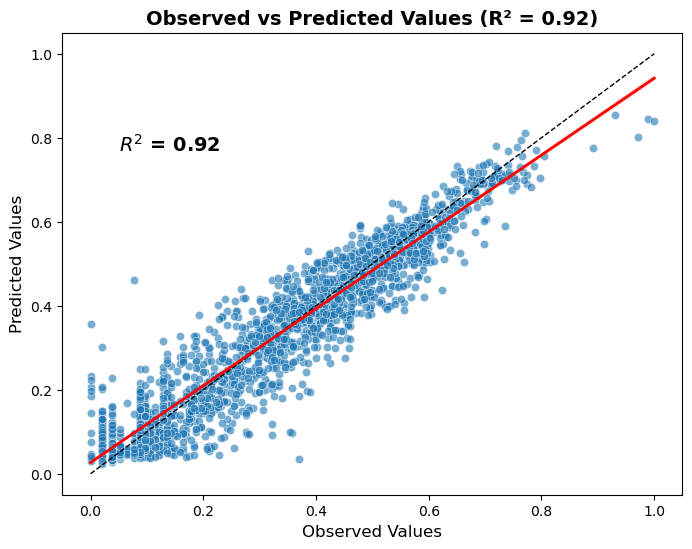

In [18]:
observed = y_test#np.random.rand(100) * 100  # Replace with y_test
predicted = xgb_pred#observed + np.random.randn(100) * 10  # Replace with y_pred

# Compute R² value
r2 = r2_score(observed, predicted)

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=observed, y=predicted, alpha=0.6)

# Add 1:1 diagonal line
plt.plot([min(observed), max(observed)], [min(observed), max(observed)], 'k--', linewidth=1)

# Add regression line
sns.regplot(x=observed, y=predicted, scatter=False, color='red', line_kws={"linewidth": 2})

# Add R² value inside the chart
plt.text(0.05 * max(observed), 0.9 * max(predicted), f"$R^2$ = {r2:.2f}", fontsize=14, weight='bold')

# Labels and title
plt.xlabel("Observed Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title(f"Observed vs Predicted Values (R² = {r2:.2f})", fontsize=14, weight='bold')


# Assess Feature Importance

In [19]:
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

             Feature  Importance
18      log_distance    0.900328
3          pct_black    0.016573
16  pct_public_trans    0.009414
15           pct_car    0.008928
4          pct_asian    0.007409
19     median_income    0.006158
5       pct_hispanic    0.006114
2          pct_white    0.005311
8        pct_elderly    0.005016
6          pct_young    0.004352
7          pct_adult    0.003948
10      pct_high_edu    0.003663
9        pct_low_edu    0.003514
11  pct_short_comute    0.003142
12   pct_long_comute    0.003124
17          pct_0car    0.003040
1         pct_female    0.002615
0           pct_male    0.002576
13         pct_unemp    0.002406
14           pct_emp    0.002370


C:\Users\mchukwu\AppData\Local\Temp\ipykernel_21840\779585022.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


Text(0.5, 1.0, 'Feature Importance from Random Forest Regression')

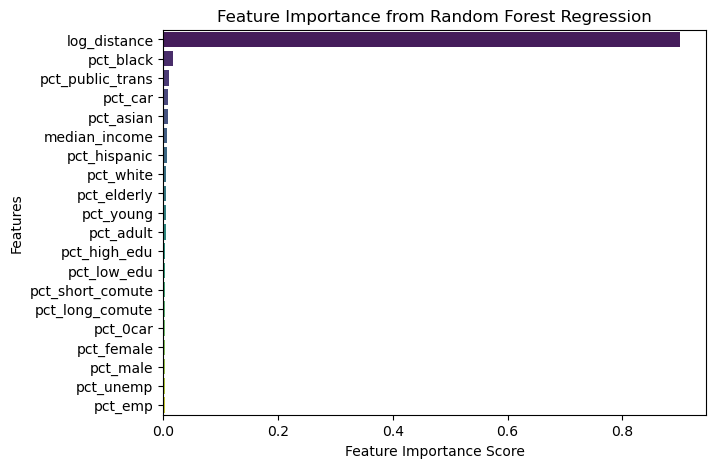

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot horizontal bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")

# Labels and title
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Regression")

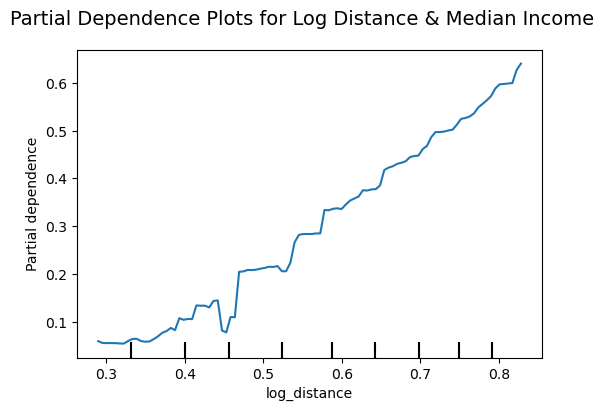

In [21]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Define the features for partial dependence plot
#features = ['log_distance', 'median_income']

# Create PDP plot
fig, ax = plt.subplots(figsize=(6, 4))
display = PartialDependenceDisplay.from_estimator(
    rf,  # Your trained Random Forest model
    X_train,  # Training data
    ['log_distance'],
    ax=ax
)

plt.suptitle("Partial Dependence Plots for Log Distance & Median Income", fontsize=14)
plt.show()


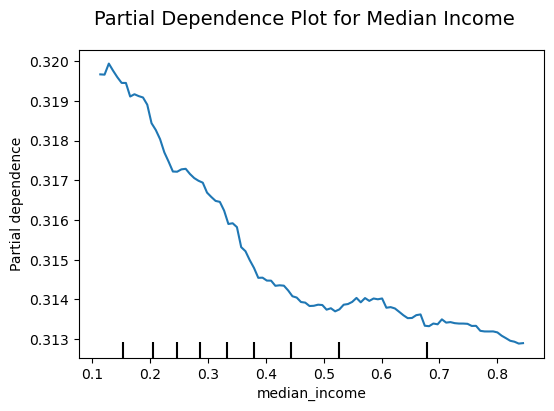

In [22]:
# Create a new figure and axis for median_income
fig, ax = plt.subplots(figsize=(6, 4))

# Generate the Partial Dependence Plot for median_income
display = PartialDependenceDisplay.from_estimator(
    rf,  # Trained Random Forest model
    X_train,  # Training dataset
    ['median_income'],  # Only median_income
    ax=ax
)

plt.suptitle("Partial Dependence Plot for Median Income", fontsize=14)
plt.show()

# Introduce Explainable AI (XAI)

<p>SHAP takes longer time to output--hence we default it to markdown</p>

# Load City's data and train RF Model 

In [23]:
#Load Data
NY_df = pd.read_csv('./ml_folder/NY_df_ml_export.csv')
LA_df = pd.read_csv('./ml_folder/LA_df_ml_export.csv')
IL_df = pd.read_csv('./ml_folder/IL_df_ml_export.csv')
PH_df = pd.read_csv('./ml_folder/PH_df_ml_export.csv')
HT_df = pd.read_csv('./ml_folder/HT_df_ml_export.csv')
AZ_df = pd.read_csv('./ml_folder/AZ_df_ml_export.csv')
SD_df = pd.read_csv('./ml_folder/SD_df_ml_export.csv')
DA_df = pd.read_csv('./ml_folder/DA_df_ml_export.csv')
SJ_df = pd.read_csv('./ml_folder/SJ_df_ml_export.csv')
SF_df = pd.read_csv('./ml_folder/SF_df_ml_export.csv')

# Define the City DataFrames

In [24]:
# Dictionary of city dataframes
city_dfs = {
    "San Jose": SJ_df,
    "San Diego": SD_df,
    "Chicago": IL_df,
    "Dallas": DA_df,
    "Houston": HT_df,
    "Los Angeles": LA_df,
    "Phoenix": AZ_df,
    "New York": NY_df,
    "Philadelphia": PH_df,
    "San Francisco": SF_df
}

# Define target variable and features
target = "log_visits"
features = [col for col in NY_df.columns if col != target]  # Assuming all cities have same features


# Train Random Forest for Each City

In [25]:
# Store results
results = {}

for city, df in city_dfs.items():
    print(f"Training model for {city}...")

    # Split data
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)

    # Store results
    results[city] = {
        "y_test": y_test,
        "y_pred": y_pred,
        "r2": r2_score(y_test, y_pred)
    }


Training model for San Jose...
Training model for San Diego...
Training model for Chicago...
Training model for Dallas...
Training model for Houston...
Training model for Los Angeles...
Training model for Phoenix...
Training model for New York...
Training model for Philadelphia...
Training model for San Francisco...


# Plot Observed vs Predicted for Each City

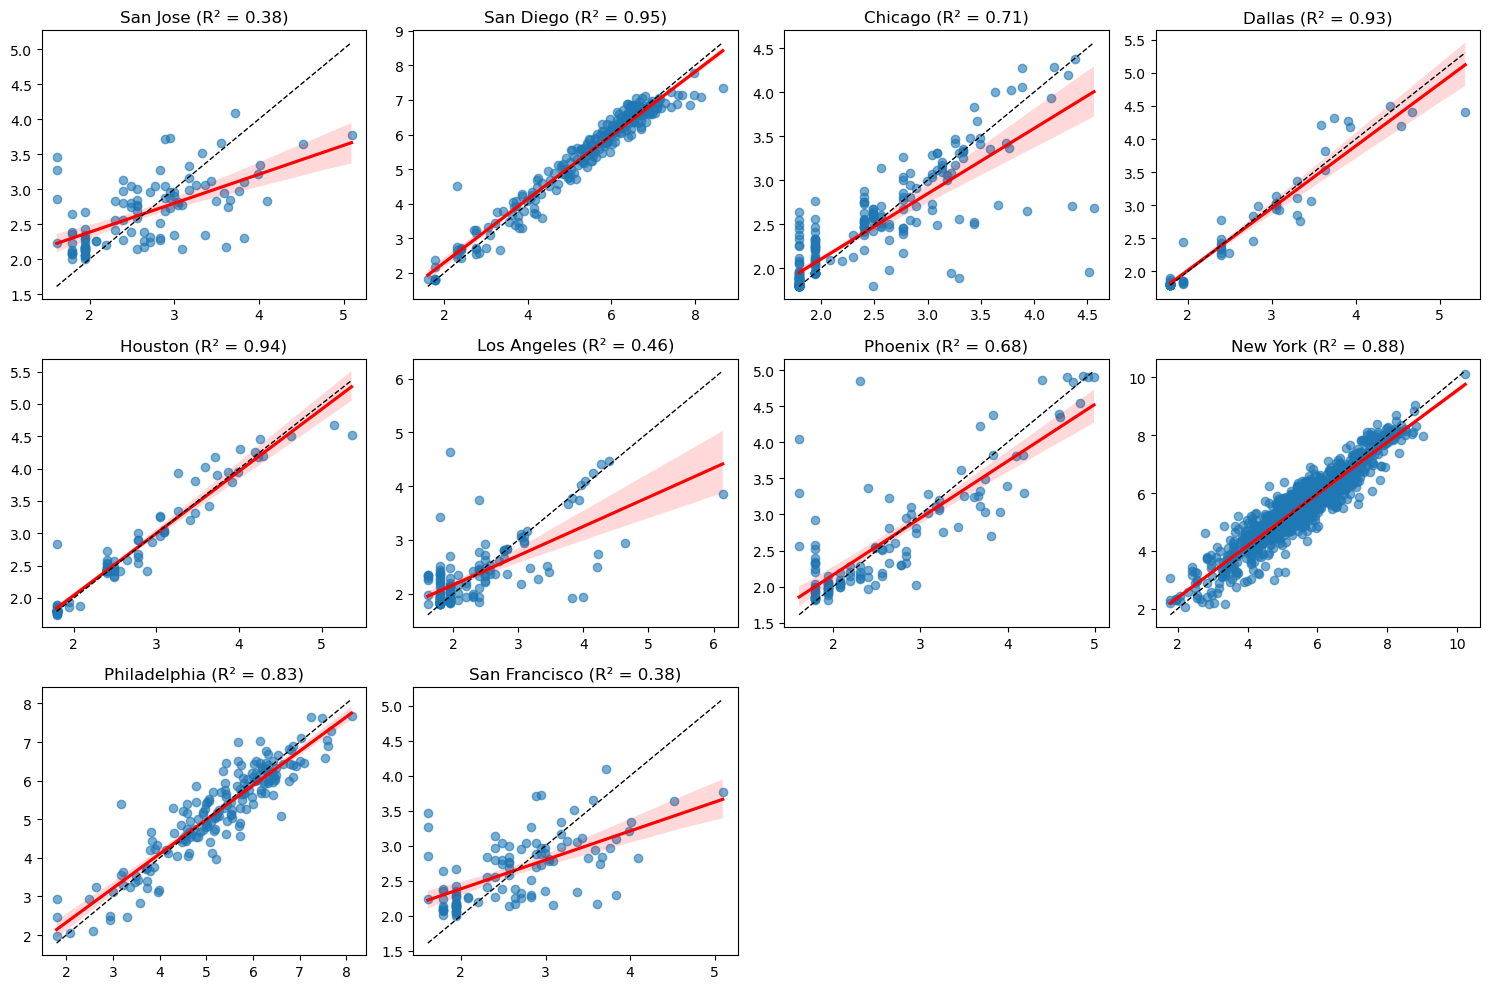

In [26]:
# Get the number of cities
num_cities = len(results)

# Set up figure layout
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for idx, (city, data) in enumerate(results.items()):
    ax = axes[idx]

    # Scatter plot
    ax.scatter(data["y_test"], data["y_pred"], alpha=0.6)

    # Fit regression line
    sns.regplot(x=data["y_test"], y=data["y_pred"], scatter=False, color="red", ax=ax)

    # Diagonal line
    ax.plot([min(data["y_test"]), max(data["y_test"])], [min(data["y_test"]), max(data["y_test"])], 'k--', linewidth=1)

    # Titles & Labels
    ax.set_title(f"{city} (R² = {data['r2']:.2f})")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Remove any empty subplots
for idx in range(num_cities, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()

In [27]:
# Store results
results = {}

for city, df in city_dfs.items():
    print(f"Training model for {city}...")

    # Split data
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)

    # Store results (including model)
    results[city] = {
        "rf_model": rf,  # Store trained model
        "y_test": y_test,
        "y_pred": y_pred,
        "r2": r2_score(y_test, y_pred)
    }


Training model for San Jose...
Training model for San Diego...
Training model for Chicago...
Training model for Dallas...
Training model for Houston...
Training model for Los Angeles...
Training model for Phoenix...
Training model for New York...
Training model for Philadelphia...
Training model for San Francisco...


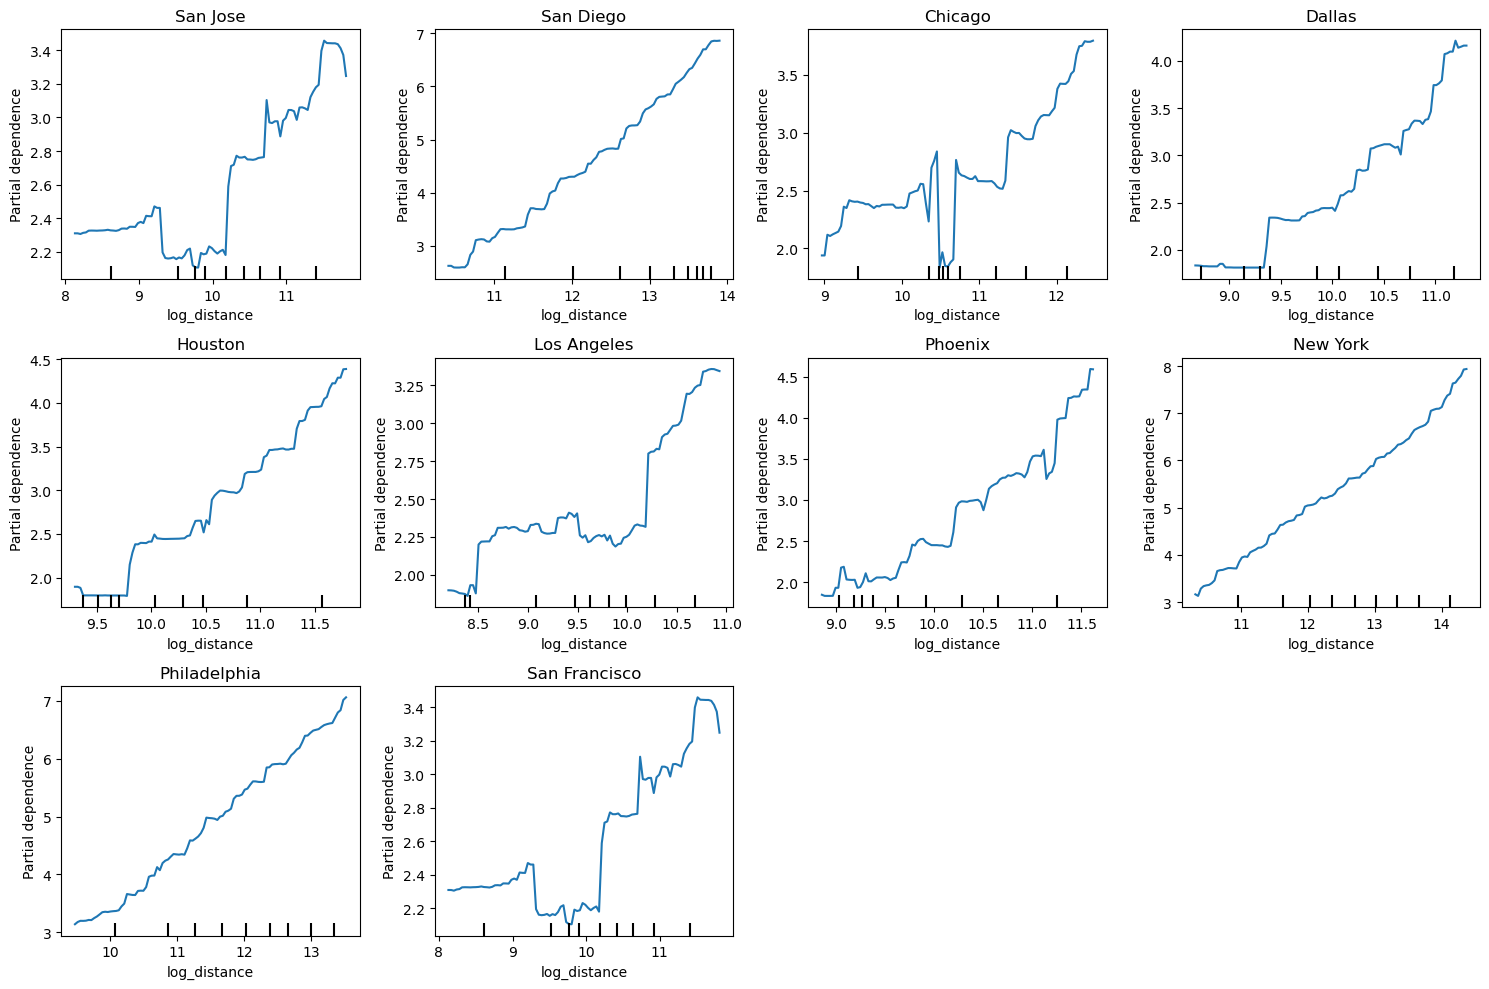

In [28]:
num_cities = len(results)

from sklearn.inspection import PartialDependenceDisplay

# Create subplots for 10 cities
fig, axes = plt.subplots(3, 4, figsize=(15, 10), sharex=True)  # 2 rows, 5 columns
axes = axes.flatten()  # Flatten for easier indexing

# Iterate through each city and plot the PDP for 'log_distance'
for idx, (city, result) in enumerate(results.items()):
    rf_model = result['rf_model']  # Retrieve trained model
    
    # Generate the Partial Dependence Plot
    PartialDependenceDisplay.from_estimator(
        rf_model,
        city_dfs[city][features],  # Use respective city's dataset
        ['log_distance'],
        ax=axes[idx]
    )
    
    axes[idx].set_title(f"{city}")
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')

# Remove any empty subplots
for idx in range(num_cities, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
#plt.savefig('PDP_log_distance.png',dpi=300)